#### Problem 1

>a) Perform a regression analysis with the model $x=A+Bt$ with the data given and plotted below.

>b) Could the parameter values be integers?

>c) We are now given undertainties in $x$: dx = np.array([0.08, 0.07, 0.08, 0.15, 0.09, 0.07, 0.06, 0.09, 0.09, 0.07, 0.08, 0.12, 0.11, 0.09, 0.07, 0.12, 0.15, 0.14, 0.13, 0.12]). Repeat the regression analysis.

<details>
<summary>Hint for b)</summary>
You can use the standard score to measure the deviation from a value.
</details>
<details>
<summary>Hint for c)</summary>
You can use sigma=dx which provides the uncertainties, and use absolute_sigma=True to signal the the uncertainties are absolute.
</details>

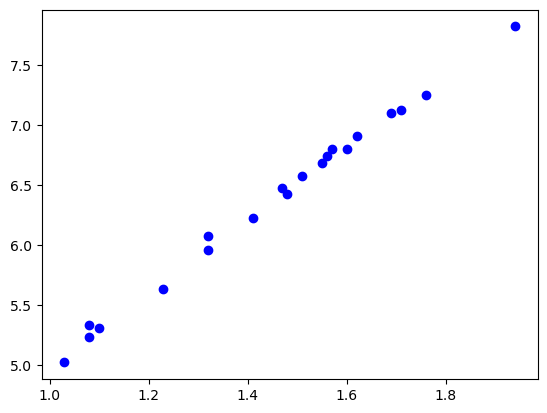

In [421]:
import numpy as np
t = np.array([1.56, 1.1, 1.55, 1.69, 1.48, 1.32, 1.32, 1.23, 1.51, 1.47, 1.41, 1.71, 1.94, 1.57, 1.62, 1.03, 1.08, 1.76, 1.6, 1.08])
x = np.array([6.74, 5.31, 6.68, 7.1, 6.42, 6.07, 5.96, 5.63, 6.57, 6.47, 6.22, 7.12, 7.82, 6.8, 6.91, 5.02, 5.23, 7.25, 6.8, 5.33])
import matplotlib.pyplot as plt
plt.figure()
plt.plot(t,x,'bo')
plt.show()

#### Answer (a)

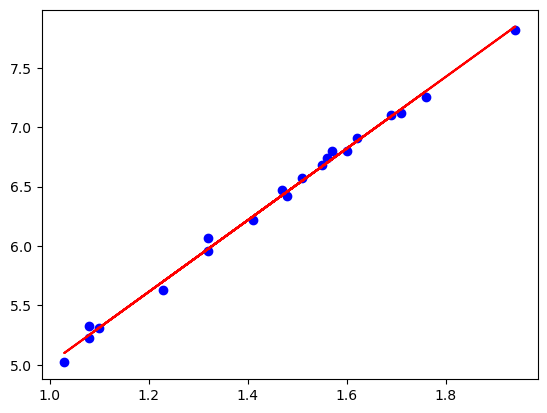

Values of A,B is approx: 
 [1.99131164 3.01838674]
The uncertanty is: 
 [0.06668488 0.04529595]


In [422]:
# We start of by defining the model
def f(t,A,B):
    return A + B*t

from scipy.optimize import curve_fit
# We fit the model to the data
param, cov = curve_fit(f, t, x)
plt.figure()
plt.plot(t,x,'bo')
plt.plot(t,f(t, param[0], param[1]), 'r-')
plt.show()

print("Values of A,B is approx: \n", param)
print("The uncertanty is: \n", np.sqrt(np.diag(cov)))

So we can see we identify that based on the model A, B should be equal to 2 and 3. Lets check that:

In [423]:
from uncertainties import *
A = ufloat(param[0], np.sqrt(np.diag(cov))[0])
B = ufloat(param[1], np.sqrt(np.diag(cov))[1])
print(f"A = {A}")
print(f"B = {B}")
print(f"A std score is {A.std_score(2)}")
print(f"B std score is {B.std_score(3)}")

A = 1.99+/-0.07
B = 3.02+/-0.05
A std score is 0.1302897566689186
B std score is -0.4059246782129229


Dette betyder at $A,B = 2,3$, da $score < 2$. For en sikkerhedskyld lad os tjekke residualen og om der er systematiske afvigelser, som betyder modellen ikke er god nok.

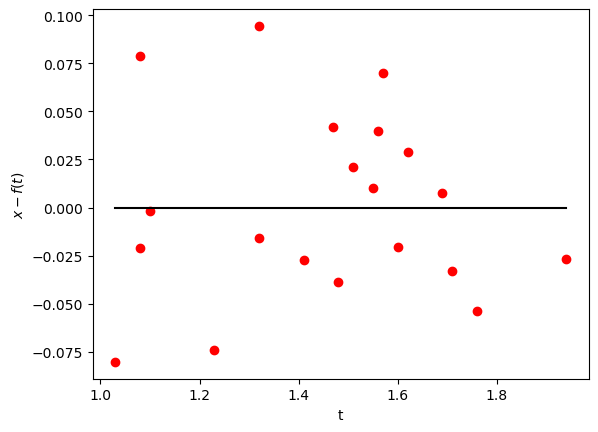

In [424]:
plt.figure()
plt.plot(t,x-f(t,*param),'ro')
plt.plot([np.min(t),np.max(t)],[0,0],'k-')
plt.xlabel('t')
plt.ylabel('$x-f(t)$')
plt.show()

Som vi kan se er der ikke nogen systematisk fejl i vores fit, da punkterne ligger tilfældigt over og under vores fit.

#### Answer (b)

Som vi fandt kunne variablerne A og B bestemmes til at være 2 og 3, så de kan godt være integer værdier.

#### Answer (c)
Vi indskriver værdier:

Values of A,B is approx: 
 [1.9760133  3.03477035]
The uncertanty is: 
 [0.13704224 0.09473368]


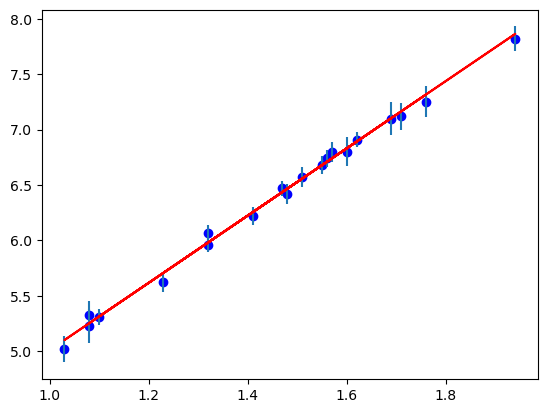

In [425]:
dx = np.array([0.08, 0.07, 0.08, 0.15, 0.09, 0.07, 0.06, 0.09, 0.09, 0.07, 0.08, 0.12, 0.11, 0.09, 0.07, 0.12, 0.15, 0.14, 0.13, 0.12])

param, cov = curve_fit(f, t, x, sigma=dx, absolute_sigma=True)
print("Values of A,B is approx: \n", param)
print("The uncertanty is: \n", np.sqrt(np.diag(cov)))

plt.figure()
plt.plot(t,x,'bo')
plt.errorbar(t,x,yerr=dx,fmt='none')
plt.plot(t,f(t, param[0], param[1]), 'r-')
plt.show()

In [426]:
A = ufloat(param[0], np.sqrt(np.diag(cov))[0])
B = ufloat(param[1], np.sqrt(np.diag(cov))[1])
print(f"A = {A}")
print(f"B = {B}")
print(f"A std score is {A.std_score(2)}")
print(f"B std score is {B.std_score(3)}")

A = 1.98+/-0.14
B = 3.03+/-0.09
A std score is 0.17503141561617683
B std score is -0.36703261969544615


Når vi gør brug af dataen fra dt, så ser vi at vi kan sætte $A,B = 2, 3$. Så vi kan konkludere 

#### Problem 2

We consider the physical situation where an object at the time, $t=0$, has initial velocity $v_0$. After a time , $t$, moving with constant acceleration, $a$, the object has the final velocity, $v$.

>a) Investigate how the initial velocity depends on the acceleration, time, and final velocity, that is determine a model $v_0 = f(a,t,v)$
<details>
<summary>Hint 1)</summary>
Start by determining which base dimensions are present in the independent parameter, then determine characteristic scales for these dimensions.
</details>
<details>
<summary>Hint 2)</summary>
Insert the characteristic scales in the equation to obtain an equation with only dimensionless parameters. Some parameters are 1, these are not real parameters an can be discarded which leads to fewer parameters in the equation.
</details>
<details>
<summary>Hint 3)</summary>
Use the provided data to calculate the values of the dimensionless parameters. Plot the dimensionless dependent parameter as a function of the dimensionless independent parameter.
</details>
<details>
<summary>Hint 4)</summary>
Suggest a model based on the plot. Perform a regression analysis. Perhaps some of the terms can be discarded or some values can be simple, such as an integer or a simple fraction. Insert this in the dimensionless model and derive from this an expression for the original dependent parameter af a function of the independent parameters.
</details>

Below is given six data points for time, acceleration, inital velocity, and final velocity. All are in SI units.
Data are organized such that *t[0]*, *a[0]*, *v0[0]*, and *v[0]* comes from the same experiment.

In [427]:
import numpy as np
t = np.array([0.363,1.761,1.956,2.246,1.256,0.110])
a = np.array([-0.168,-0.953,-1.093,-0.555,0.691,-0.446])
v0 = np.array([0.341,4.652,2.767,3.523,0.058,-2.298])
v = np.array([0.292,3.063,0.552,2.163,0.664,-2.178])

#### Svar
Til denne opgave er vi givet modellen $v_0 = f(a,t,v)$. Vi vil nu beskrive dette via de naturlige skalaer:
$$
\lambda = v \cdot t
$$
$$
\tau = t
$$

Vi vil nu beskrive alle vores variabler via de naturlige skalaer så der er ingen enhed:
$$
v_0 / (\lambda / \tau) = f(a / (\lambda / \tau^2), t / \tau, v / (\lambda / \tau))
$$

Dette giver os:
$$
v_0 / v = f(a / (v \cdot t / t^2), 1, 1) = f(a \cdot t / v)
$$

Vi har nu
$$
\frac{v_0}{v} = F(\frac{a \cdot t}{v})
$$

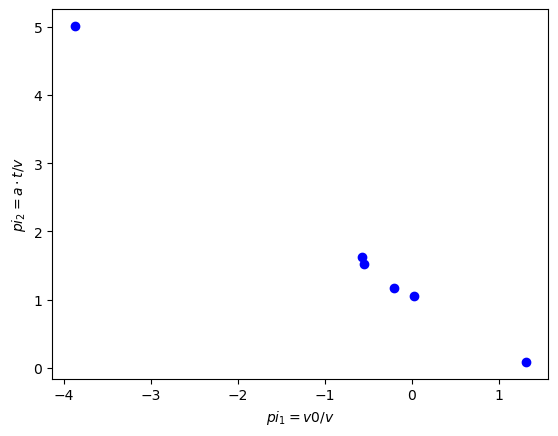

In [428]:
# We start of by defining the model
pi_1 = v0/v
pi_2 = a*t / v

# We can now plot this
plt.figure()
plt.plot(pi_2,pi_1,'bo')
plt.xlabel('$pi_1 = v0/v$')
plt.ylabel('$pi_2 = a \cdot t/v$')
plt.show()

Vi kan nu udlede en 1D formel:

Values of A,B is approx: 
 [ 1.11438726 -0.97618071]
The uncertanty is: 
 [0.07615459 0.04473857]


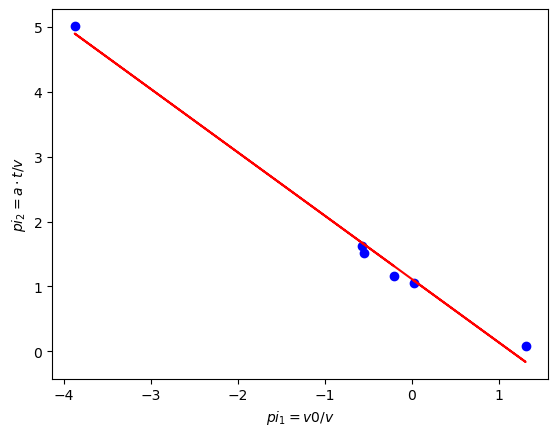

In [429]:
param, cov = curve_fit(f, pi_2, pi_1)
print("Values of A,B is approx: \n", param)
print("The uncertanty is: \n", np.sqrt(np.diag(cov)))

plt.figure()
plt.plot(pi_2,pi_1,'bo')
plt.plot(pi_2,f(pi_2, *param), 'r-')
plt.xlabel('$pi_1 = v0/v$')
plt.ylabel('$pi_2 = a \cdot t/v$')
plt.show()


Vi tjekker for systematisk afvigelse

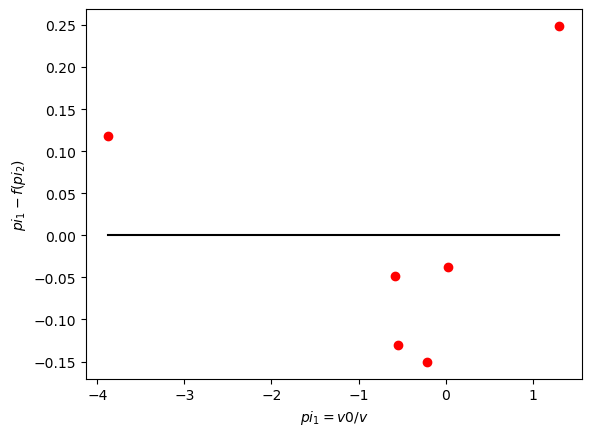

In [430]:
plt.figure()
plt.plot(pi_2,pi_1-f(pi_2,*param),'ro')
plt.plot([np.min(pi_2),np.max(pi_2)],[0,0],'k-')
plt.xlabel("$pi_1 = v0/v$")
plt.ylabel('$pi_1-f(pi_2)$')
plt.show()

Det ser ikke ud som om der er systematisk afvigelse, så vi køre med dette og tjekker om vi kan sætte $A,B = 1, -1$.

In [431]:
A = ufloat(param[0], np.sqrt(np.diag(cov))[0])
B = ufloat(param[1], np.sqrt(np.diag(cov))[1])
print(f"A = {A}")
print(f"B = {B}")
print(f"A std score is {A.std_score(1)}")
print(f"B std score is {B.std_score(-1)}")

A = 1.11+/-0.08
B = -0.98+/-0.04
A std score is -1.502040337351211
B std score is -0.5324105074056115


Vi kan nu kigge på at finde:
$$
\frac{v_0}{v} = A + B \cdot \frac{a \cdot t}{v}
$$
Vi ville se noget om starthastigheden, så vi har:
$$
v_0 = A \cdot v + B \cdot a \cdot t \Leftrightarrow v_0 = v - a \cdot t
$$


#### Problem 3

Below are given data with $y$-uncertainties. The uncertainties are drawn from a normal distribution.

>a) Suggest two different models for the data and perform regression analyses with the data.


<details><summary>Hint a)</summary>
Does the data look like a trigonometric function or a polynomial?
</details>


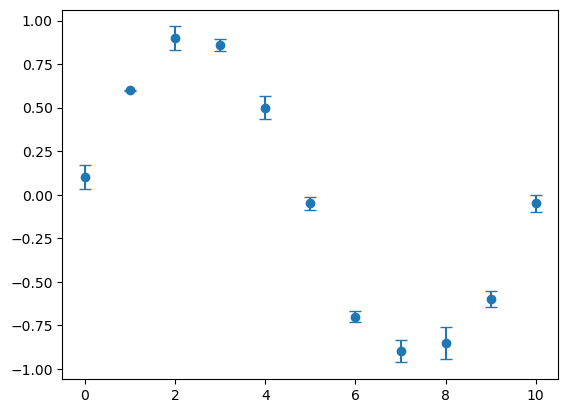

In [439]:
import numpy as np
rng = np.random.default_rng(9824892795729)
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([0.1,0.6,0.9,0.86,0.5,-0.05,-0.7,-0.9,-0.85,-0.6,-0.05])
dy = np.random.normal(loc=0.05,scale=0.02,size = np.size(x))
import matplotlib.pyplot as plt
plt.figure()
plt.errorbar(x,y,yerr=dy,fmt='o',capsize=4)
plt.show()

#### Svar
Jeg har valgt at vælge de to modeller til:
$$
A + Bt \land A + sin(B \cdot t)
$$

Values of A,B is approx for $A + Bt$: 
 [ 0.74685084 -0.14685466]
The uncertanty is: 
 [0.00338367 0.00286924] for $A + Bt$ 

Values of A,B is approx for $A + sin(Bt)$: 
 [0.00647847 0.6346962 ]
The uncertanty is: 
 [0.00274336 0.00285456] for $A + sin(Bt)$


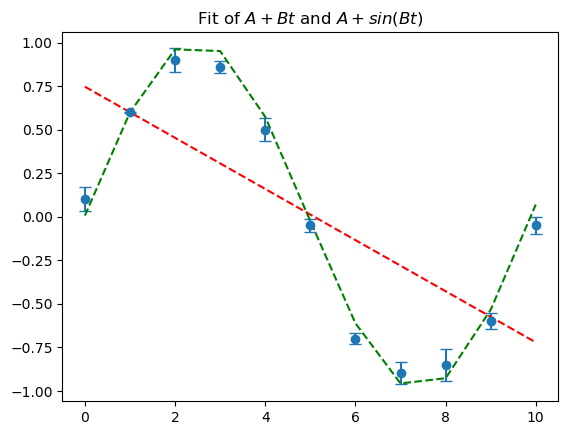

In [440]:
param1, cov1 = curve_fit(f, x, y, sigma=dy, absolute_sigma=True)
print("Values of A,B is approx for $A + Bt$: \n", param1)
print("The uncertanty is: \n", np.sqrt(np.diag(cov1)), "for $A + Bt$ \n")

def g(x,A,B):
    return A + np.sin(B*x)
param2, cov2 = curve_fit(g, x, y, sigma=dy, absolute_sigma=True)
print("Values of A,B is approx for $A + sin(Bt)$: \n", param2)
print("The uncertanty is: \n", np.sqrt(np.diag(cov2)), "for $A + sin(Bt)$")

plt.figure()
plt.title("Fit of $A + Bt$ and $A + sin(Bt)$")
plt.errorbar(x,y,yerr=dy,fmt='o',capsize=4)
plt.plot(x,f(x, *param1), 'r--')
plt.plot(x,g(x, *param2), 'g--')
plt.show()


Vi kan nu tjekke for systematisk afvigelse:

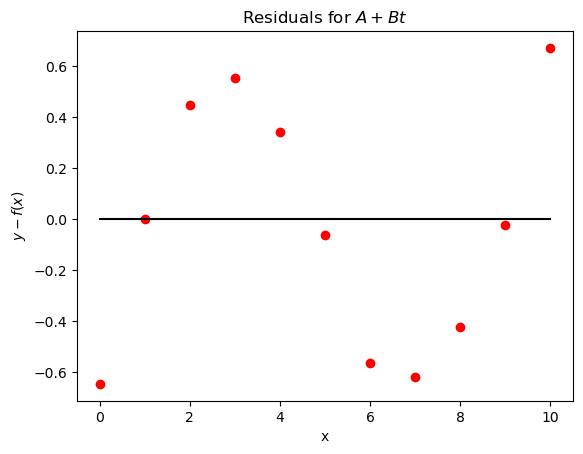

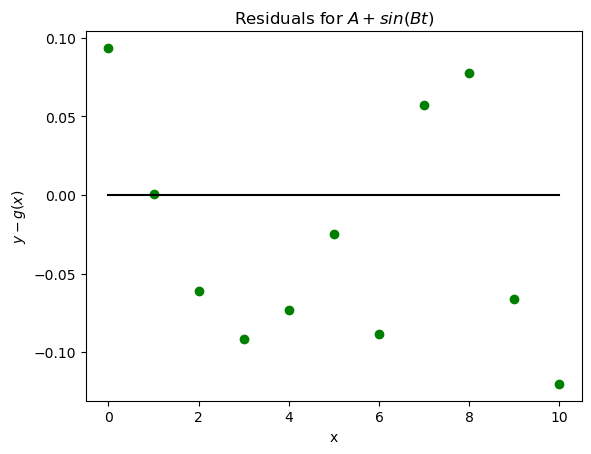

In [441]:
plt.figure()
plt.title("Residuals for $A + Bt$")
plt.plot(x,y-f(x,*param1),'ro')
plt.plot([np.min(x),np.max(x)],[0,0],'k-')
plt.xlabel('x')
plt.ylabel('$y-f(x)$')
plt.show()
plt.figure()
plt.title("Residuals for $A + sin(Bt)$")
plt.plot(x,y-g(x,*param2),'go')
plt.plot([np.min(x),np.max(x)],[0,0],'k-')
plt.xlabel('x')
plt.ylabel('$y-g(x)$')
plt.show()


#### Problem 4

A ball is dropped from the height, $h=10$ m. 
Belows is data for time in the array *t*, and height in the array *y*, and the has been plotted.


>a) Perform a regression analysis with the model $y=A+Bt+Ct^2$. Comment on uncertainties of the parameters. What do you conclude?

>b) If you concluded that the model is incorrect, then change the model and redo the regression analysis. Plot the data and regression curve.

>c) What is the value of the acceleration of gravity, $g$, that you have found? Is it comparable to the accepted value $g=9.82 \text{ m/s}^2$

<details>
<summary>Hint a)</summary>
If an uncertainty in a parameter is very large perhaps that term should not be in the model.
</details>
<details>
<summary>Hint c)</summary>
If you use a model y=A+Bt+Ct**2 how can you determine g from the quadratic coefficient? To assess compatibility you can compare 
with a value using the standard score.
</details>


Data is in the arrays below.

In [435]:
import numpy as np
t = np.array([0.00, 0.14, 0.29, 0.43, 0.57, 0.71, 0.86, 1.00, 1.14, 1.28, 1.43])
y = np.array([9.92, 9.74, 9.55, 8.96, 8.15, 7.45, 6.25, 5.13, 3.34, 1.64, 0.07])

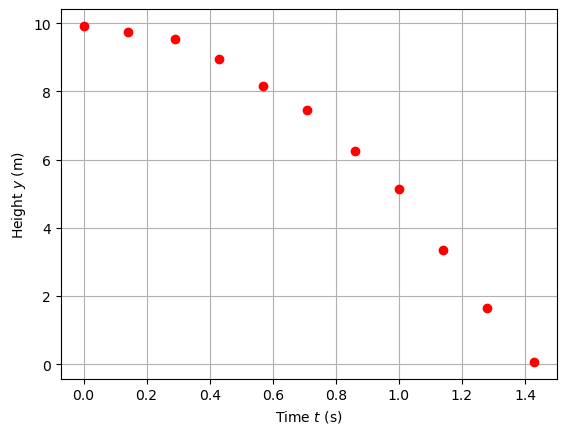

In [436]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Height $y$ (m)')
plt.plot(t,y,'ro')
plt.grid()
plt.show()

#### Problem 5

We investigate the period of oscillation, $T$, for a pendulum as a function of the amplitude of the initial angle, $\theta$.
Below we have data in the arrays *T* og *theta* and the data has been plotted.


>a) The plot below suggest that the period of the oscillation is a constant. Perform a regression analyse, and plot data and regression function. Pay attention to the scale. Comment briefly on uncertainties and the quality of the fit.

>b) Suggest another regression model, $T=f(\theta)$ and perform the regression analysis. Comment briefly.

<details>
<summary>Hint b)</summary>
Could a quadratic model account for the data?
</details>



Data for angle and period of oscillation

In [437]:
import numpy as np
theta = np.array([0.0175, 0.0441, 0.0707, 0.0974, 0.1240, 0.1506, 0.1773, 0.2039, 0.2306, 0.2572, 0.2838, 0.3105, 0.3371, 0.3638, 0.3904, 0.4170, 0.4437, 0.4703, 0.4970, 0.5236])
T = np.array([0.5013, 0.5013, 0.5014, 0.5016, 0.5017, 0.5020, 0.5022, 0.5026, 0.5029, 0.5033, 0.5038, 0.5043, 0.5048, 0.5054, 0.5061, 0.5068, 0.5075, 0.5083, 0.5091, 0.5100])

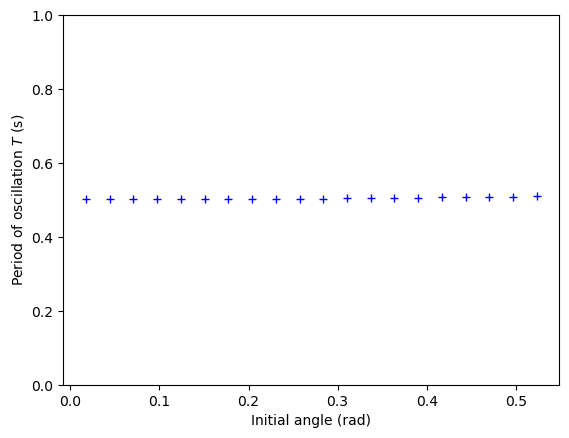

In [438]:
import matplotlib.pyplot as plt
plt.figure()
plt.ylim(0,1)
plt.xlabel('Initial angle (rad)')
plt.ylabel('Period of oscillation $T$ (s)')
plt.plot(theta,T,'b+')
plt.show()